# Exploratory analysis of ACTS data

This notebook demonstrates usage of the latest ACTS data (matching what will be used in the Tracking ML Challenge) and explores some of the data's characteristics

In [1]:
from __future__ import print_function

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from dataset import load_event

%matplotlib notebook

In [2]:
data_dir = '/global/cscratch1/sd/sfarrell/ACTS/prod_20171031_233247'

In [3]:
# Load the first event
sample = 'event000000000'
data = load_event(os.path.join(data_dir, sample))
hits, particles, truth = map(pd.DataFrame, data)

/global/cscratch1/sd/sfarrell/ACTS/prod_20171031_233247/event000000000


In [4]:
# Calculate derived variables
hits['r'] = np.sqrt(hits.x**2 + hits.y**2)
hits['phi'] = np.arctan2(hits.y, hits.x)

In [5]:
hits.columns

Index([u'hit_id', u'volume_id', u'layer_id', u'module_id', u'x', u'y', u'z',
       u'ex', u'ey', u'ez', u'phi', u'theta', u'ephi', u'etheta', u'ncells',
       u'r'],
      dtype='object')

<IPython.core.display.Javascript object>


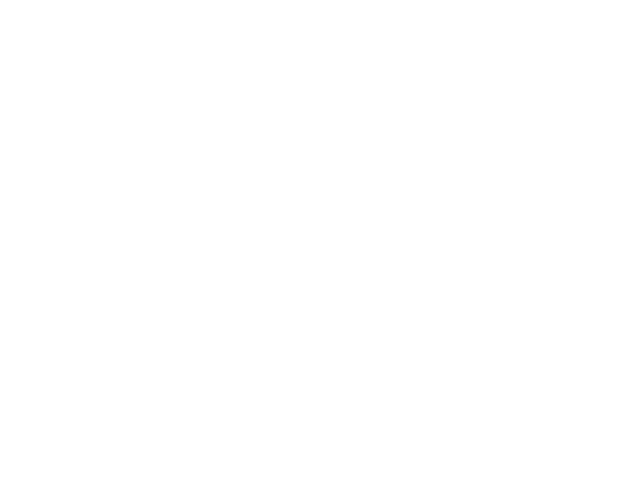

In [28]:
fig = plt.figure()

In [29]:
fig.add_subplot?

In [36]:
hits.shape

(104996, 16)

In [37]:
particles.shape

(13748, 8)

<IPython.core.display.Javascript object>


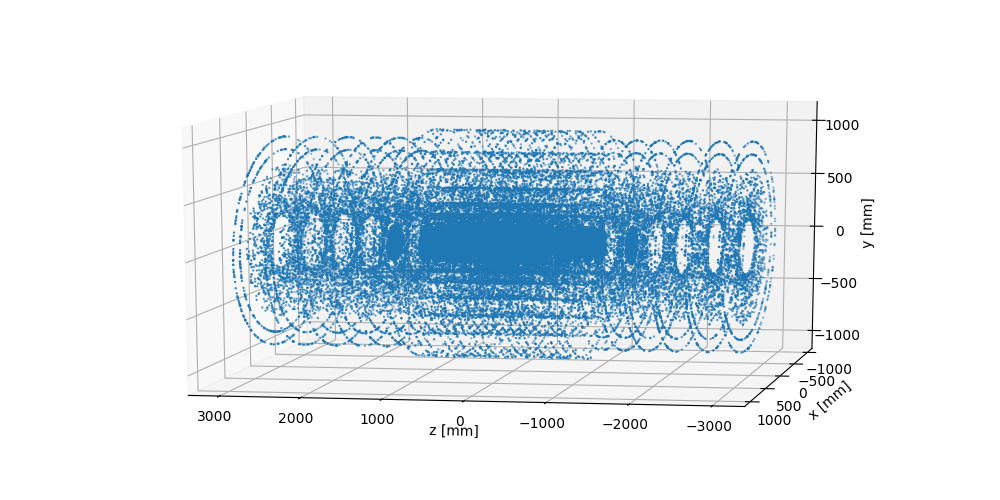

In [42]:
# Draw the full 3D distribution of hits
ax = plt.figure(figsize=(10, 5)).add_subplot(111, projection='3d')
ax.scatter(hits.z, hits.x, hits.y, s=0.5)
ax.set_xlabel('z [mm]')
ax.set_ylabel('x [mm]')
ax.set_zlabel('y [mm]')
ax.view_init(10, 100)
#ax.axis('off')
plt.tight_layout()

<IPython.core.display.Javascript object>


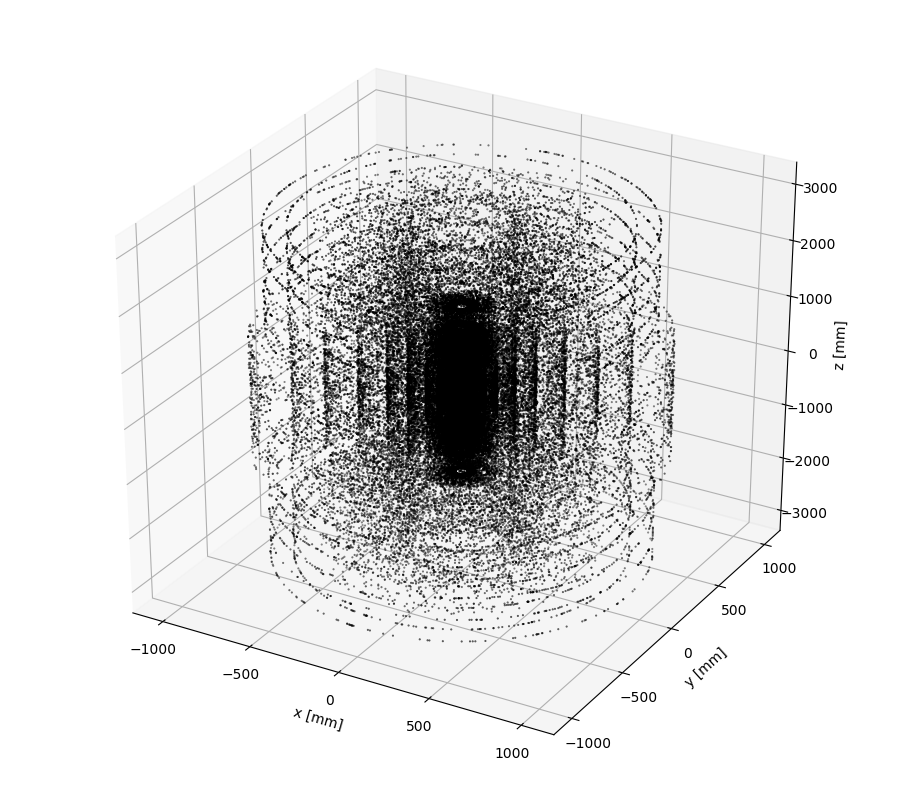

In [6]:
# Draw the full 3D distribution of hits
ax = plt.figure(figsize=(9, 8)).add_subplot(111, projection='3d')
ax.scatter(hits.x, hits.y, hits.z, s=1, c='k', marker='.')
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_zlabel('z [mm]')
plt.tight_layout()

### 2D scatter plots

<IPython.core.display.Javascript object>


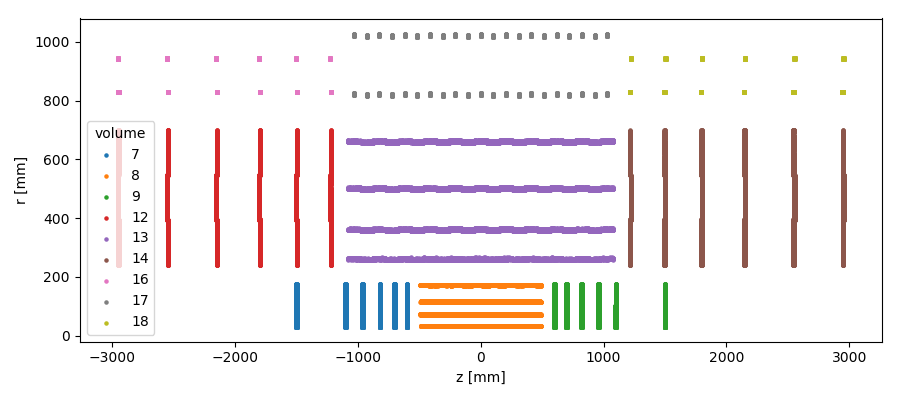

<IPython.core.display.Javascript object>


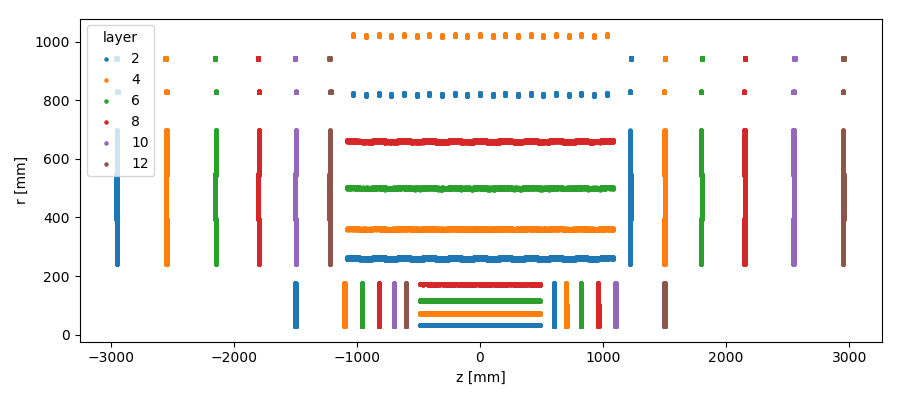

In [7]:
# Draw the hits by volume
plt.figure(figsize=(9,4))
for vol, vol_hits in hits.groupby('volume_id'):
    plt.scatter(vol_hits.z, vol_hits.r, s=5, label=vol)
plt.xlabel('z [mm]')
plt.ylabel('r [mm]')
plt.legend(loc=0, title='volume')
plt.tight_layout()

# Draw the hits by layer
plt.figure(figsize=(9,4))
for lay, lay_hits in hits.groupby('layer_id'):
    plt.scatter(lay_hits.z, lay_hits.r, s=5, label=lay)
plt.xlabel('z [mm]')
plt.ylabel('r [mm]')
plt.legend(loc=0, title='layer')
plt.tight_layout()

<IPython.core.display.Javascript object>


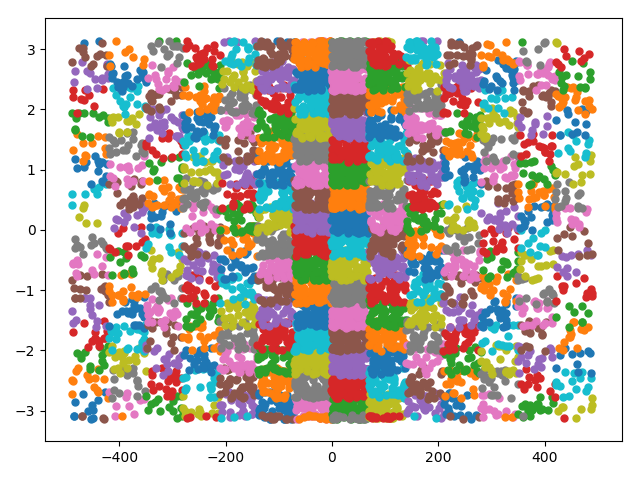

In [8]:
# Visualize modules on the first layer
lay0_hits = hits.groupby(['volume_id', 'layer_id']).get_group((8, 2))
plt.figure()
# Draw each module separately
for mod, mod_hits in lay0_hits.groupby('module_id'):
    plt.scatter(mod_hits.z, mod_hits.phi, s=100, marker='.')
plt.tight_layout()

<IPython.core.display.Javascript object>


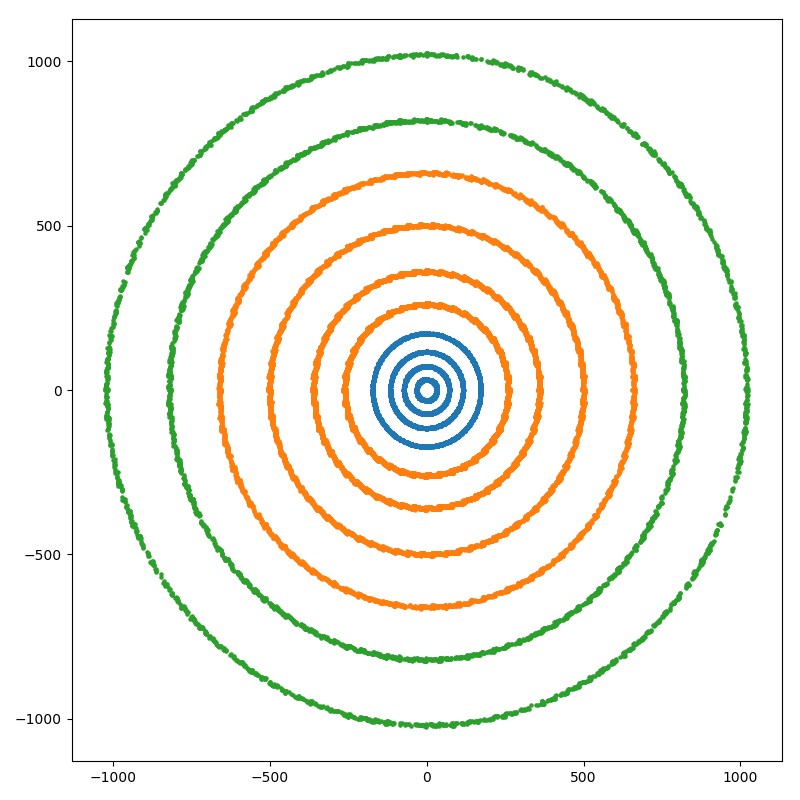

In [9]:
# Draw X-Y view of the barrel volumes
barrel_vols = [8, 13, 17]
vol_groups = hits.groupby('volume_id')

plt.figure(figsize=(8,8))
for vol in barrel_vols:
    vol_hits = vol_groups.get_group(vol)
    plt.scatter(vol_hits.x, vol_hits.y, s=5)
plt.tight_layout()

<IPython.core.display.Javascript object>


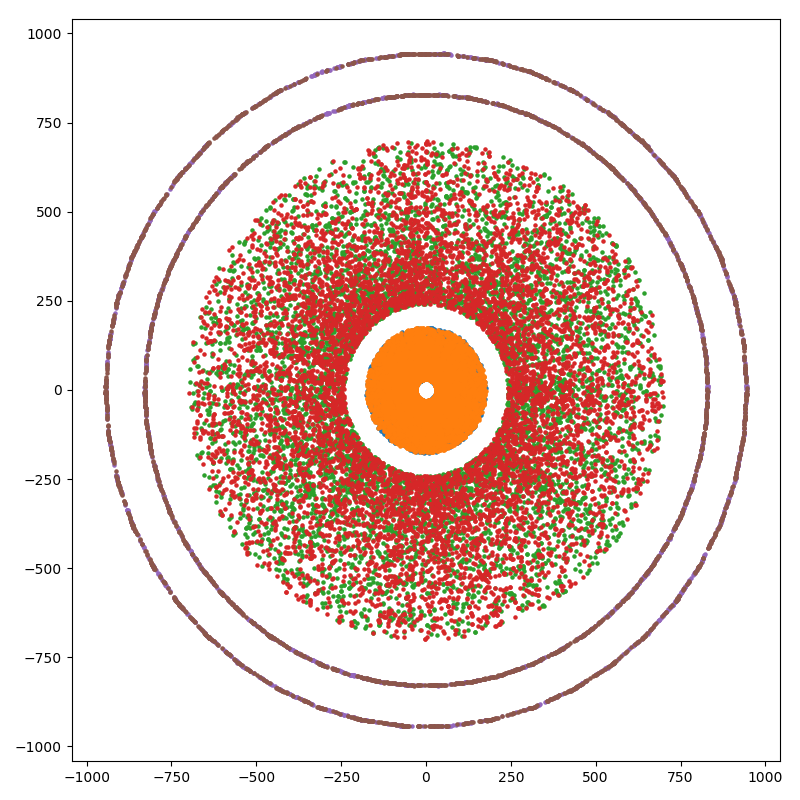

In [10]:
# Draw X-Y view of the endcaps
endcap_vols = [7, 9, 12, 14, 16, 18]
plt.figure(figsize=(8,8))
for vol in endcap_vols:
    vol_hits = vol_groups.get_group(vol)
    plt.scatter(vol_hits.x, vol_hits.y, s=5)
plt.tight_layout()